In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_0103-1450.csv", delimiter=',')

# acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, motor1, motor2, motor3, motor4, quat, current_time, height
# Normalizing the PWM
imu_data[:,6:10] = imu_data[:,6:10]/((1<<16)-1)

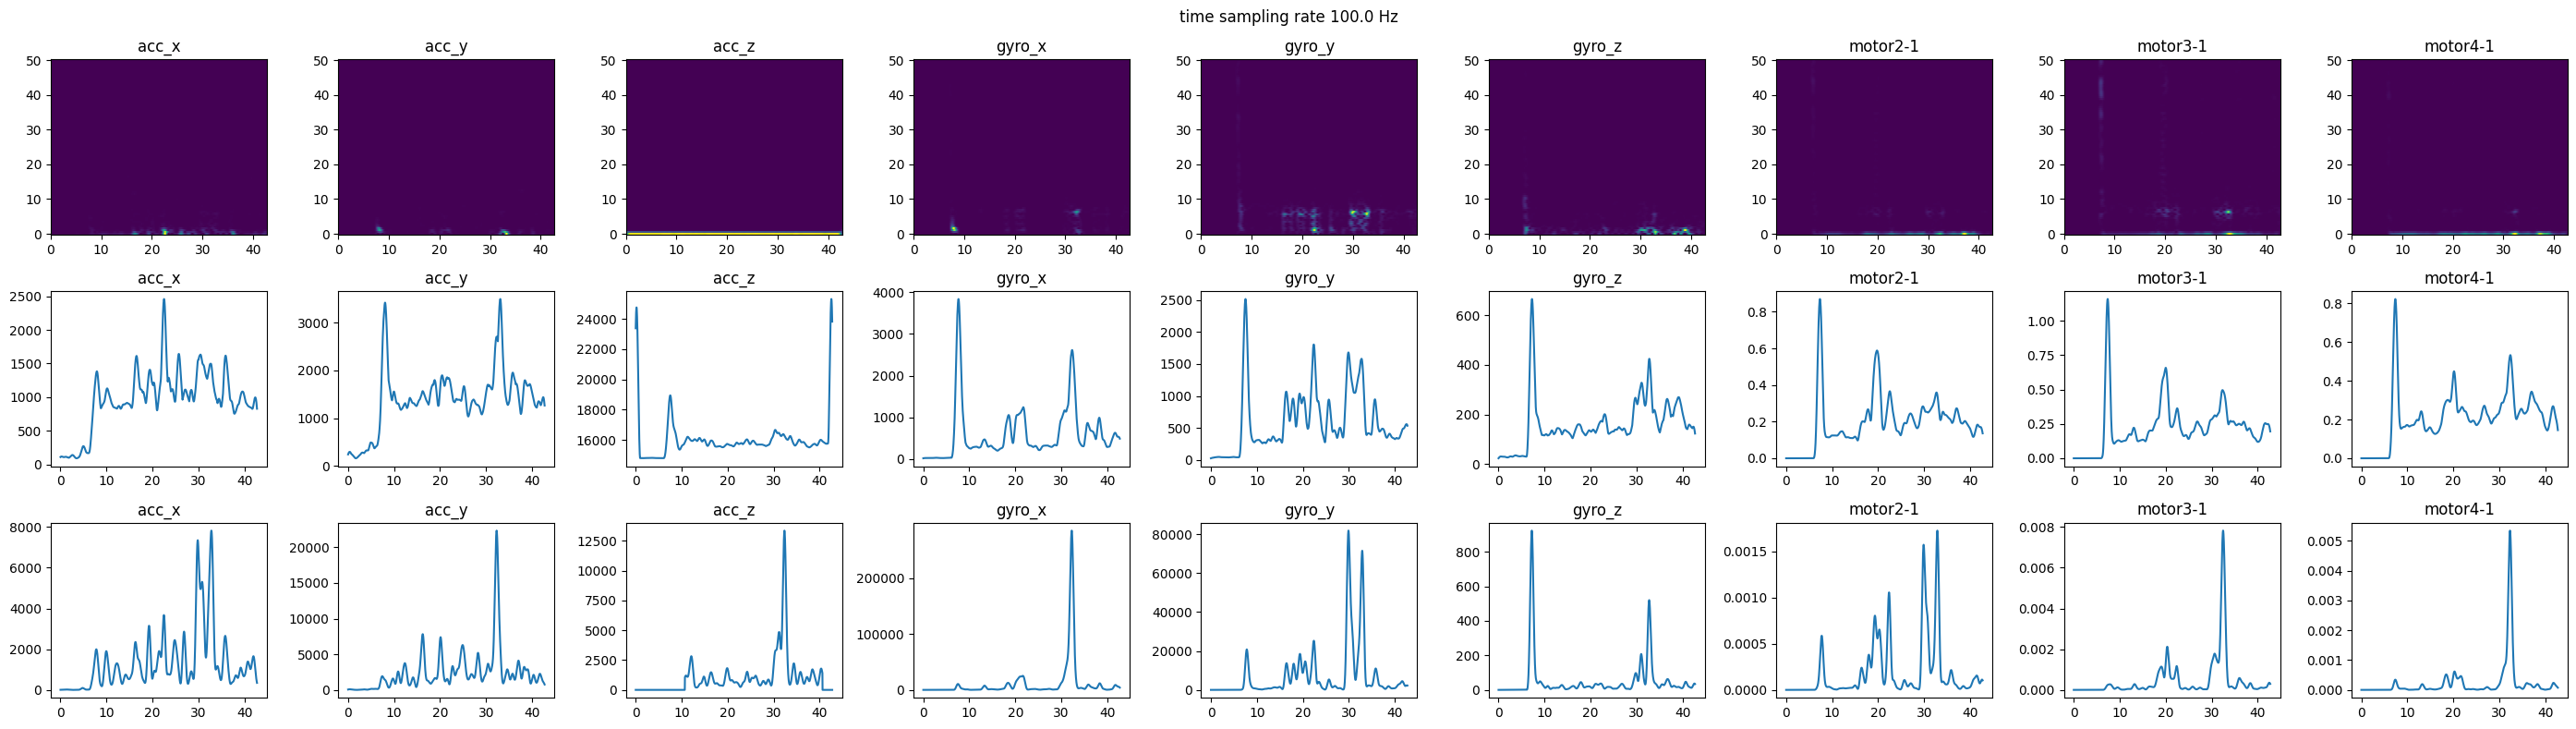

In [2]:
from scipy.signal import stft

fs=100
nperseg=200
noverlap=199


# 创建一个包含3行6列的子图布局
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(28, 8))

# 绘制第1个子图
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 0].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 0].set_title('acc_x')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 0].plot(time_vector, pp)
axes[1, 0].set_title('acc_x')
axes[2, 0].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 0].set_title('acc_x')


# 绘制第2个子图
f, t, Zxx = stft(imu_data[:,1], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 1].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 1].set_title('acc_y')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 1].plot(time_vector, pp)
axes[1, 1].set_title('acc_y')
axes[2, 1].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 1].set_title('acc_y')



# 绘制第3个子图
f, t, Zxx = stft(imu_data[:,2], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 2].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 2].set_title('acc_z')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 2].plot(time_vector, pp)
axes[1, 2].set_title('acc_z')
acc_z3power = np.sum(abs(Zxx[12:17,:]**2),axis=0)
acc_z3power[:int(len(acc_z3power)*0.25)] = np.zeros(int(len(acc_z3power)*0.25))
acc_z3power[-int(len(acc_z3power)*0.05):] = np.zeros(int(len(acc_z3power)*0.05))
axes[2, 2].plot(time_vector, acc_z3power)
axes[2, 2].set_title('acc_z')


# 绘制第4个子图
f, t, Zxx = stft(imu_data[:,3], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 3].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 3].set_title('gyro_x')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 3].plot(time_vector, pp)
axes[1, 3].set_title('gyro_x')
axes[2, 3].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 3].set_title('gyro_x')


# 绘制第5个子图
f, t, Zxx = stft(imu_data[:,4], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 4].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 4].set_title('gyro_y')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 4].plot(time_vector, pp)
axes[1, 4].set_title('gyro_y')
axes[2, 4].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 4].set_title('gyro_y')



# 绘制第6个子图
f, t, Zxx = stft(imu_data[:,5], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 5].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 5].set_title('gyro_z')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 5].plot(time_vector, pp)
axes[1, 5].set_title('gyro_z')
axes[2, 5].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 5].set_title('gyro_z')



# 绘制第7个子图
f, t, Zxx = stft(imu_data[:,7]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 6].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 6].set_title('motor2-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 6].plot(time_vector, pp)
axes[1, 6].set_title('motor2-1')
axes[2, 6].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 6].set_title('motor2-1')


# 绘制第8个子图
f, t, Zxx = stft(imu_data[:,8]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 7].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 7].set_title('motor3-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 7].plot(time_vector, pp)
axes[1, 7].set_title('motor3-1')
axes[2, 7].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 7].set_title('motor3-1')


# 绘制第9个子图
f, t, Zxx = stft(imu_data[:,9]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 8].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 8].set_title('motor4-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 8].plot(time_vector, pp)
axes[1, 8].set_title('motor4-1')
axes[2, 8].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 8].set_title('motor4-1')


plt.suptitle(f'time sampling rate {len(t)/t[-1]:.1f} Hz')

# 调整子图之间的间距
plt.tight_layout()
plt.show()


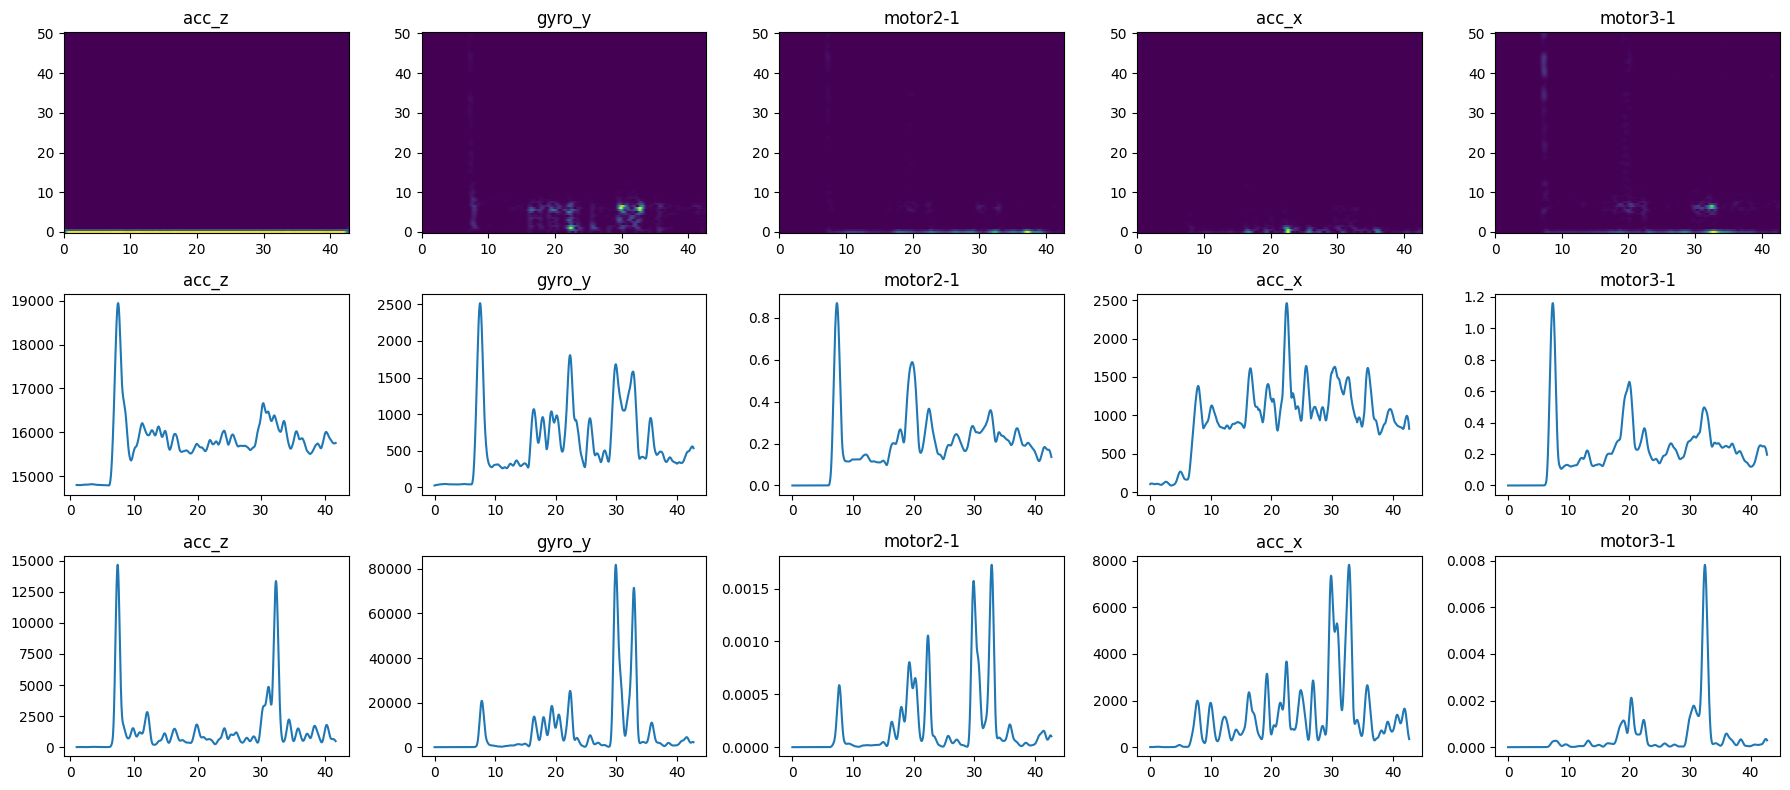

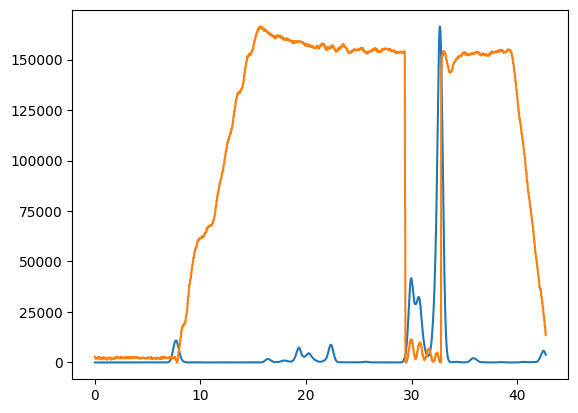

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 8))


f1, t1, Zxx1 = stft(imu_data[:,2], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm1 = axes[0, 0].pcolormesh(t1, f1, np.abs(Zxx1)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 0].set_title('acc_z')
pp1 = np.sum(np.abs(Zxx1), axis=0)
time_vector = np.arange(len(pp1)) *((nperseg-noverlap)/fs)
axes[1, 0].plot(time_vector[100:-100], pp1[100:-100])
axes[1, 0].set_title('acc_z')

axes[2, 0].plot(time_vector[100:-100], np.sum(abs(Zxx1[12:17,:]**2),axis=0)[100:-100])


# acc_z3power = np.sum(abs(Zxx1[12:17,:]**2),axis=0)
# acc_z3power[:int(len(acc_z3power)*0.25)] = np.zeros(int(len(acc_z3power)*0.25))
# acc_z3power[-int(len(acc_z3power)*0.05):] = np.zeros(int(len(acc_z3power)*0.05))
# axes[2, 0].plot(time_vector, acc_z3power)
axes[2, 0].set_title('acc_z')


f2, t2, Zxx2 = stft(imu_data[:,4], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm2 = axes[0, 1].pcolormesh(t2, f2, np.abs(Zxx2)**2, shading='auto')
# cbar = fig.colorbar(:int(len(gh1)*0.85)pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 1].set_title('gyro_y')
pp2 = np.sum(np.abs(Zxx2), axis=0)
time_vector = np.arange(len(pp2)) *((nperseg-noverlap)/fs)
axes[1, 1].plot(time_vector, pp2)
axes[1, 1].set_title('gyro_y')

axes[2, 1].plot(time_vector, np.sum(abs(Zxx2[12:17,:]**2),axis=0))
axes[2, 1].set_title('gyro_y')


f3, t3, Zxx3 = stft(imu_data[:,7]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 2].pcolormesh(t, f, np.abs(Zxx3)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 2].set_title('motor2-1')
pp3 = np.sum(np.abs(Zxx3), axis=0)
time_vector = np.arange(len(pp3)) *((nperseg-noverlap)/fs)
axes[1, 2].plot(time_vector, pp3)
axes[1, 2].set_title('motor2-1')

axes[2, 2].plot(time_vector, np.sum(abs(Zxx3[12:17,:]**2),axis=0))
axes[2, 2].set_title('motor2-1')



f4, t4, Zxx4 = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 3].pcolormesh(t, f, np.abs(Zxx4)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 3].set_title('acc_x')
pp4 = np.sum(np.abs(Zxx4), axis=0)
time_vector = np.arange(len(pp4)) *((nperseg-noverlap)/fs)
axes[1, 3].plot(time_vector, pp4)
axes[1, 3].set_title('acc_x')

axes[2, 3].plot(time_vector, np.sum(abs(Zxx4[12:17,:]**2),axis=0))
axes[2, 3].set_title('acc_x')




f5, t5, Zxx5 = stft(imu_data[:,8]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 4].pcolormesh(t, f, np.abs(Zxx5)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 4].set_title('motor3-1')
pp5 = np.sum(np.abs(Zxx5), axis=0)
time_vector = np.arange(len(pp5)) *((nperseg-noverlap)/fs)
axes[1, 4].plot(time_vector, pp5)
axes[1, 4].set_title('motor3-1')
axes[2, 4].plot(time_vector, np.sum(abs(Zxx5[12:17,:]**2),axis=0))
axes[2, 4].set_title('motor3-1')

plt.tight_layout()
plt.show()

# Plot the fusion result with Cross Spectrum
gh1 = np.sum(abs(Zxx1[12:17,:]),axis=0)
gh2 = np.sum(abs(Zxx2[12:17,:]),axis=0)
gh3 = np.sum(abs(Zxx3[12:17,:]),axis=0)
gh4 = np.sum(abs(Zxx4[12:17,:]),axis=0)
gh5 = np.sum(abs(Zxx5[12:17,:]),axis=0)
fusion_result = gh1*gh2*gh3*gh4*gh5
plt.figure()
plt.plot(time_vector,fusion_result)
plt.plot(time_vector[:-1], imu_data[:,11]*(max(fusion_result)/max(imu_data[:,11])))


In [4]:

N = 100
pro_N =20
PAF = 1e-3

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    alpha = N * (PAD ** (-1 / N) - 1)
    target = []
    index = np.arange(1 + N/2 + pro_N/2, len(xc) - N/2 - pro_N/2)
    CFAR_Threshold = np.zeros(len(index))

    for i in index:
        cell_left = xc[int(i - N/2 - pro_N/2) : int(i - pro_N/2)]
        # cell_right = xc[int(i + pro_N/2 + 1) : int(i + N/2 + pro_N/2 + 1)]
        cell_right = 1e10
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])
        # print(alpha)
        CFAR_Threshold[int(i - N/2 - pro_N/2-1)] = Z * alpha
        if xc[int(i)] > Z * alpha:
            target.append(int(i))
    return index, CFAR_Threshold, np.array(target)


index, CFAR_Threshold, target_idx = cfar_so(fusion_result, N, pro_N, PAF)

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=imu_data[:,-2],y=np.abs(fusion_result),
                    mode='lines',
                    line=dict(width=1.5),
                    name='fusion_result'))
fig.add_trace(go.Scatter(x=imu_data[index.astype(int),-2], y=(CFAR_Threshold),
                    mode='lines',
                    line=dict(width=1.5),
                    name='Threshhold'))

fig.add_trace(go.Scatter(x=imu_data[:,-2],y=imu_data[:,-1]*(max(CFAR_Threshold)/max(imu_data[:,-1])),
                    mode='lines',
                    line=dict(width=1.5),
                    name='Height'))

fig.add_trace(go.Scatter(x=imu_data[target_idx.astype(int),-2], y=fusion_result[np.array(target_idx)-int(N/2+pro_N/2)-1],
                    mode='markers',
                    marker=dict(symbol='x', size=10),
                    # line=dict(width=0.01),
                    name='S2_Target'))

fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Angular acceleration rad/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            # dtick = 500,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 原始数据
x = np.linspace(0-6.25,93.75,int(93.75/6.25)+2)
y = np.array([-5000, 0, 4485, 7570, 9374, 10885, 12277, 13522, 14691, 15924, 17174, 18179, 19397, 20539, 21692, 22598, 23882])

# 定义多项式函数
def func(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# 进行曲线拟合
params, params_covariance = curve_fit(func, x, y)

# 提取拟合参数
a = params[0]
b = params[1]
c = params[2]
d = params[3]
e = params[4]

# 生成拟合曲线的x值
x_fit = np.linspace(x.min(), x.max(), 100)

# 计算拟合曲线的y值
y_fit = func(x_fit, a, b, c, d, e)

# 绘制原始数据和拟合曲线
# plt.plot(x, y, 'ro', label='Original Data')
# plt.plot(x_fit, y_fit, 'b-', label='Fitted Curve')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()
RPM = func(np.asarray(imu_data[:,6:10]*100), a, b, c, d, e)

# Convert quaternion to rotation matrix
def rotation_matrix(quat):
    rot_mat = np.ones([3,3])
    a = quat[0]**2
    b = quat[1]**2
    c = quat[2]**2
    d = quat[3]**2
    e = quat[0]*quat[1]
    f = quat[0]*quat[2]
    g = quat[0]*quat[3]
    h = quat[1]*quat[2]
    i = quat[1]*quat[3]
    j = quat[2]*quat[3]
    rot_mat[0,0] = a - b - c + d
    rot_mat[0,1] = 2 * (e - j)
    rot_mat[0,2] = 2 * (f + i)
    rot_mat[1,0] = 2 * (e + j)
    rot_mat[1,1] = -a + b - c + d
    rot_mat[1,2] = 2 * (h - g)
    rot_mat[2,0] = 2 * (f - i)
    rot_mat[2,1] = 2 * (h + g)
    rot_mat[2,2] = -a - b + c + d
    
    return rot_mat


# 创建旋转矩阵
def rpy2Rotation(roll, pitch, yaw):
    rotation_matrix = np.array([
        [np.cos(yaw)*np.cos(pitch), -np.sin(yaw)*np.cos(roll) + np.cos(yaw)*np.sin(pitch)*np.sin(roll), np.sin(yaw)*np.sin(roll) + np.cos(yaw)*np.sin(pitch)*np.cos(roll)],
        [np.sin(yaw)*np.cos(pitch), np.cos(yaw)*np.cos(roll) + np.sin(yaw)*np.sin(pitch)*np.sin(roll), -np.cos(yaw)*np.sin(roll) + np.sin(yaw)*np.sin(pitch)*np.cos(roll)],
        [-np.sin(pitch), np.cos(pitch)*np.sin(roll), np.cos(pitch)*np.cos(roll)]
    ])
    return rotation_matrix
R = np.zeros([imu_data.shape[0], 3, 3])
for i in range(imu_data.shape[0]):
    R[i, :, :] = rotation_matrix([0,0,0,1])


m = 0.0362 # mass
# g = 9.81 # gravity
g = 9.83 # gravity
rho = 1.225 # air density
D = 0.0505  # diameter of the rotor
rpm2rs = 60 ** 2

C_t_fixed = 0.09937873049125099
# C_t_fixed = 0.12037873049125099
Fa = np.zeros([imu_data.shape[0], 3])
F = R[:, :, 2]




for i in range(imu_data.shape[0]):
    F_whole = m * imu_data[i, 0:3]/1000  # G = mg
    # temp[2] += m * g
    r_square = RPM[i, 0]**2 + RPM[i, 1]**2 + RPM[i, 2]**2 + RPM[i, 3]**2
    # r_square = RPM[i, 0]**2*4
    thrust = C_t_fixed / rpm2rs * rho * D ** 4 * r_square # c_t = C_t_fixed / rpm2rs * rho * D ** 4. r_square = n**2+n**2+n**2+n**2
    Fa[i, :] = F_whole - thrust * F[i, :]

# Offset the decrerase of PWM power manully.
noisy_signal = Fa[:,2]
tem0 = np.linspace(0.008,0.018, int(len(noisy_signal)/2)) # Only for the end half signal 
noisy_signal = np.hstack((noisy_signal[:len(noisy_signal)-len(tem0)],noisy_signal[len(noisy_signal)-len(tem0):]+tem0))+0.00
# 使用均值滤波进行降噪
window_size = 10
filtered_signal = np.zeros_like(noisy_signal)
filtered_signal2 = np.zeros_like(filtered_signal)
for i in range(window_size, len(noisy_signal) - window_size):
    filtered_signal[i] = np.mean(noisy_signal[i - window_size:i])
    filtered_signal2[i] = np.mean(filtered_signal[i - window_size:i])

# Use first order filtered result for delay consideration
S1_Target = np.zeros_like(filtered_signal)
S1_Target[filtered_signal>0.01] = 1 # Easy to show with scaling

fig = go.Figure()
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=noisy_signal,
                    mode='lines',
                    line=dict(width=0.5),
                    name='Raw FaZ'))
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=filtered_signal,
                    mode='lines',
                    line=dict(width=0.5),
                    name='Filtered Faz'))
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=S1_Target*0.051,
                    mode='lines',
                    line=dict(width=0.5),
                    name='S1_Target'))
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=imu_data[:,-1]*(1/max(imu_data[:,-1])),
                    mode='lines',
                    line=dict(width=0.5),
                    name='GT'))

fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Force Newton',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 1000,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [7]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=imu_data[:,-2], y=noisy_signal,
#                     mode='lines',
#                     line=dict(width=0.5),
#                     name='Raw FaZ'))
# fig.add_trace(go.Scatter(x=imu_data[:,-2], y=filtered_signal,
#                     mode='lines',
#                     line=dict(width=0.5),
#                     name='Filtered Faz'))

# S1_Target
S1_Target = np.zeros_like(filtered_signal)
S1_Target[filtered_signal>0.01] = 1 # Easy to show with scaling
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=S1_Target,
                    mode='lines',
                    line=dict(width=0.5),
                    name='S1_Target'))

# S2_Target detection
fig.add_trace(go.Scatter(x=imu_data[target_idx.astype(int),-2], y=np.ones_like(target_idx),
                    mode='markers',
                    marker=dict(symbol='x', size=10),
                    # line=dict(width=0.01),
                    name='S2_Target'))

# Ground Thuth
fig.add_trace(go.Scatter(x=imu_data[:,-2], y=imu_data[:,-1]*(1/max(imu_data[:,-1])),
                    mode='lines',
                    line=dict(width=0.5),
                    name='GT'))


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Force Newton',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            # dtick = 100,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()